In [1]:
from cortexlib.utils.file import read_json_file_as_dataframe
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

image_representation_reduced_to_n_pcs = 50

In [2]:
vgg19_fev_results = read_json_file_as_dataframe('../vgg19_neural_pc1/prediction.json')
vgg19_fev_pcs = vgg19_fev_results[vgg19_fev_results['n_pcs'] == image_representation_reduced_to_n_pcs].reset_index(drop=True)
vgg19_fev_pcs

,layer,n_pcs,test_r2,mean_fev
0,conv2_2,50.0,0.314790,0.333350
1,conv3_4,50.0,0.274213,0.290811
2,conv4_4,50.0,0.257534,0.273326
3,conv5_4,50.0,0.231420,0.245948
4,fc2,50.0,0.196835,0.209691


In [3]:
vgg19_dim_results = read_json_file_as_dataframe('../vgg19_neural_pc1/dimensionality.json')
vgg19_dim_results

,layer,alpha,alpha_no_pc1
0,conv2_2,1.396558,1.423482
1,conv3_4,1.514435,1.535256
2,conv4_4,1.629117,1.651906
3,conv5_4,1.829591,1.719371
4,fc2,1.587736,1.579808


In [4]:
vgg19_rsa_results = read_json_file_as_dataframe('../vgg19_neural_pc1/representational_similarity.json')
vgg19_rsa_pcs = vgg19_rsa_results[vgg19_rsa_results['n_pcs'] == image_representation_reduced_to_n_pcs].reset_index(drop=True)
vgg19_rsa_pcs

,layer,n_pcs,spearman_correlation
0,conv2_2,50.0,0.055938
1,conv3_4,50.0,0.048126
2,conv4_4,50.0,0.038319
3,conv5_4,50.0,0.041189
4,fc2,50.0,0.030681


In [5]:
# TODO: these are already using 50 PCs, but either the json should contain results for all PCS (like the ohter analyses results)
# or this standardised value should be dictated globally, for consistency
vgg19_sem_results = read_json_file_as_dataframe('../vgg19_neural_pc1/semanticity.json')

# TODO: should store each score with key 'silhouette_score'
vgg19_sem_results = vgg19_sem_results.rename(columns={'value': 'silhouette_score'})

vgg19_sem_results

,layer,silhouette_score
0,conv2_2,-0.087484
1,conv3_4,-0.061713
2,conv4_4,0.006110
3,conv5_4,0.264032
4,fc2,0.461334


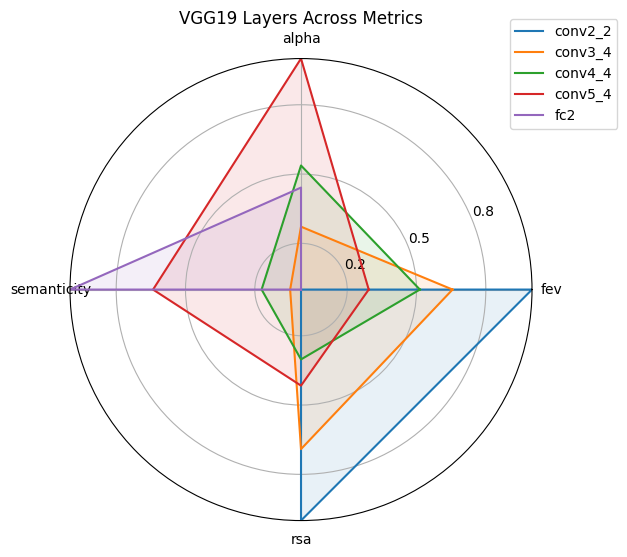

In [6]:
data = {
    'layer': vgg19_fev_pcs['layer'].values,
    'fev': vgg19_fev_pcs['mean_fev'].values,
    'alpha': vgg19_dim_results['alpha'].values,
    'semanticity': vgg19_sem_results['silhouette_score'].values,
    'rsa': vgg19_rsa_pcs['spearman_correlation'].values
}
df = pd.DataFrame(data)

# Normalise each metric to [0, 1]
metrics = ['fev', 'alpha', 'semanticity', 'rsa']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[metrics] = scaler.fit_transform(df[metrics])

labels = metrics
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in df_scaled.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=row['layer'])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.2, 0.5, 0.8])
ax.set_yticklabels(['0.2', '0.5', '0.8'])
ax.set_ylim(0, 1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("VGG19 Layers Across Metrics")
plt.show()